<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week5/digits_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

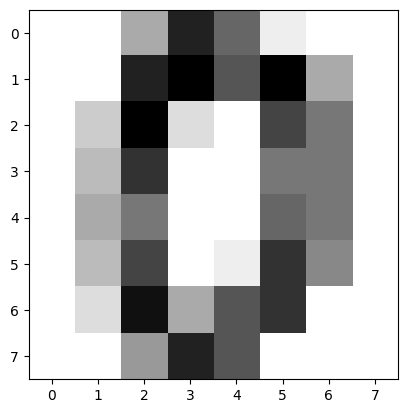

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.data
y = digits.target
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')



In [ ]:
# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 3. One-hot 인코딩
y_categorical = to_categorical(y, num_classes=10)

In [ ]:
# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42
)

In [ ]:
# 5. DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(64,), activation='relu')) #model을 하나 추가할 때 마다 층이 더 생기는 것.
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 숫자 0~9 → 10개 클래스
# Softmax의 역할, 확률을 1로 만들어줌.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy','mse'] # MSE 추가함.
)


In [ ]:

# 7. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3688 - loss: 2.0768 - mse: 0.0833 - val_accuracy: 0.8241 - val_loss: 1.0431 - val_mse: 0.0461
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8740 - loss: 0.7422 - mse: 0.0325 - val_accuracy: 0.9185 - val_loss: 0.3335 - val_mse: 0.0145
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9462 - loss: 0.2357 - mse: 0.0097 - val_accuracy: 0.9537 - val_loss: 0.1813 - val_mse: 0.0076
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9798 - loss: 0.1207 - mse: 0.0045 - val_accuracy: 0.9611 - val_loss: 0.1435 - val_mse: 0.0062
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9856 - loss: 0.0733 - mse: 0.0027 - val_accuracy: 0.9741 - val_loss: 0.1100 - val_mse: 0.0048
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9927 - loss: 0.0543 - mse: 0.0018 - val_accuracy: 0.9741 - val_loss: 0.0937 - val_mse: 0.0042
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [ ]:

# 8. 평가
loss, acc, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 정확도: {acc:.4f}")
print(f"DL 모델 테스트 MSE: {mse:.4f}")


DL 모델 테스트 정확도: 0.9759
DL 모델 테스트 MSE: 0.0037


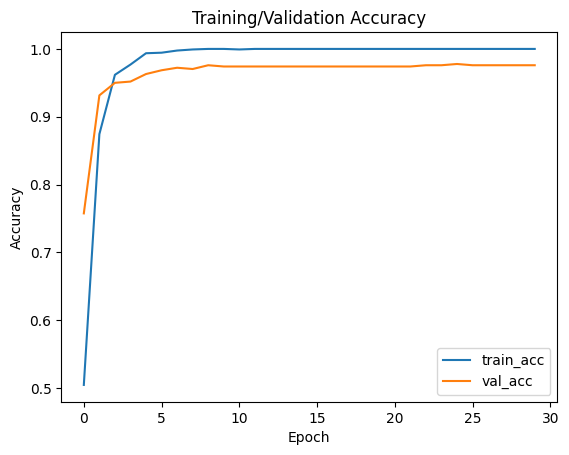

In [ ]:


# 9. 학습 곡선 시각화
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training/Validation Accuracy")
plt.show()


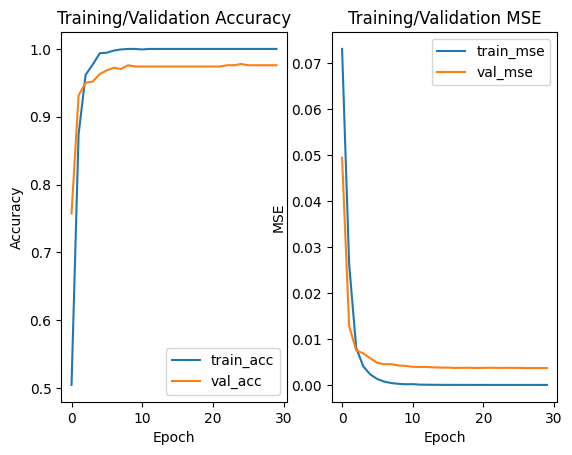

In [ ]:
# 10. 시각화

# Accuracy 그래프
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training/Validation Accuracy")

# MSE 그래프
plt.subplot(1,2,2)
plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training/Validation MSE")

plt.show()

In [ ]:
# 그래프를 보면, 10번 반복 학습 하는 시점에서 정확도가 1.0까지 오르는 것을 확인할 수 있고.
# val_acc 또한 0.9~1.0 사이에 수렴하므로 성능이 우수하다고 볼 수 있다 .